In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math

## 1. Concatenate all input sales files into single csv file and export

In [2]:
files = glob.glob('./input/*.csv')

# Method 1
# dfs = [pd.read_csv(x)for x in files]
# all_data = pd.concat(dfs, ignore_index=True)
# all_data.to_csv('./01_sales/output/all_data.csv')

# Method 2
dfs = [pd.read_csv(x) for x in files]
all_data = pd.DataFrame(np.concatenate([x.values for x in dfs]), columns=dfs[0].columns)

## 2. Data cleanup (remove NA rows, duplicated headers)

In [3]:
# Show unique values
display(all_data['Quantity Ordered'].unique())
# Count unique values
display(all_data['Quantity Ordered'].value_counts())
# Count NaN values
display(len(all_data['Quantity Ordered']) - all_data['Quantity Ordered'].count())

array(['2', nan, '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8',
       '9'], dtype=object)

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

545

In [4]:
# Remove NA values
all_data = all_data.dropna(how='all')
# Count NaN values
display(len(all_data['Quantity Ordered']) - all_data['Quantity Ordered'].count())

0

In [5]:
# Remove Duplicated headers
headers = all_data.columns
all_data = all_data[~all_data['Quantity Ordered'].str.contains('Quantity')]
display(all_data['Quantity Ordered'].unique())

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

## 3. Export clean data to csv file

In [2]:
all_data.to_csv('./output/all_data.csv', index=False)

NameError: name 'all_data' is not defined

## 4. Convert Column data type

In [3]:
all_data = pd.read_csv('./output/all_data.csv')

# Convert columns to numeric type
all_data[['Order ID', 'Quantity Ordered', 'Price Each']] = all_data[['Order ID', 'Quantity Ordered', 'Price Each']].apply(pd.to_numeric)

# Convert columns to string type (object refers to string type)
all_data[['Product', 'Purchase Address']] = all_data[['Product', 'Purchase Address']].astype(str)

# Convert column to datetime type
# Method 1
# all_data['Order Date'] = all_data['Order Date'].astype('datetime64[ns]')

# Method 2
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
display(all_data.dtypes)

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

---
# Question 1: What was the best month for sales? How much was earned for that month
---

### create a new column 'sum' = 'Quantity Ordered' * 'Price Each'

In [4]:
all_data['sum'] = all_data['Quantity Ordered'] * all_data['Price Each']

## Create a new column 'month'

In [5]:
all_data['month'] = all_data['Order Date'].dt.month

## calculate monthly sales

In [6]:
# show best month for sales
display(all_data.groupby('month')['sum'].sum().idxmax())

# show total amount of sales of best month
display(all_data.groupby('month')['sum'].sum().max())

12

4613443.340001534

## Plot yearly sales chart

<BarContainer object of 12 artists>

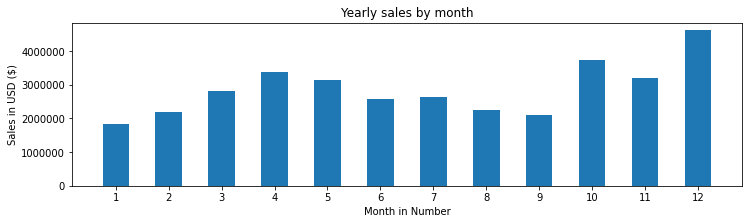

In [19]:
plt.figure(figsize=(12,3))

x = all_data.groupby('month')['sum'].sum().index
y = all_data.groupby('month')['sum'].sum()

plt.xticks(x)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month in Number')
plt.title('Yearly sales by month')
plt.ticklabel_format(style='plain')
plt.bar(x, y, width=0.5)

---
# Question 2: Which city had the highest number of sales
---

In [21]:
def getCityName(address):
    return address.split(',')[1].lstrip()

all_data['city'] = all_data['Purchase Address'].apply(lambda x : getCityName(x))

In [22]:
# show best month for sales
display(all_data.groupby('city')['sum'].sum().idxmax())

# show total amount of sales of best month
display(all_data.groupby('city')['sum'].sum().max())

# show total amount of sales of best month
display(all_data.groupby('city')['sum'].sum())

'San Francisco'

8262203.910004012

city
Atlanta          2.795499e+06
Austin           1.819582e+06
Boston           3.661642e+06
Dallas           2.767975e+06
Los Angeles      5.452571e+06
New York City    4.664317e+06
Portland         2.320491e+06
San Francisco    8.262204e+06
Seattle          2.747755e+06
Name: sum, dtype: float64

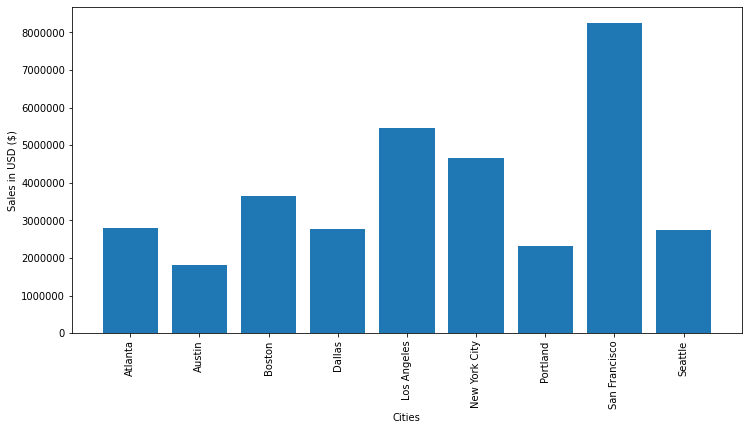

In [34]:
plt.figure(figsize=(12,6))

x = all_data.groupby('city')['sum'].sum().index
y = all_data.groupby('city')['sum'].sum()
plt.ticklabel_format(style='plain')

plt.bar(x, y)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.xticks(x, rotation='vertical', size=10)
plt.show()

---
# Question 3: What time had best sales?
---

In [54]:
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['count'] = 1
display(all_data.groupby('hour')['count'].count())

display(all_data.groupby('hour')['count'].count().idxmax())

display(all_data.groupby('hour')['count'].count().max())

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: count, dtype: int64

19

12905

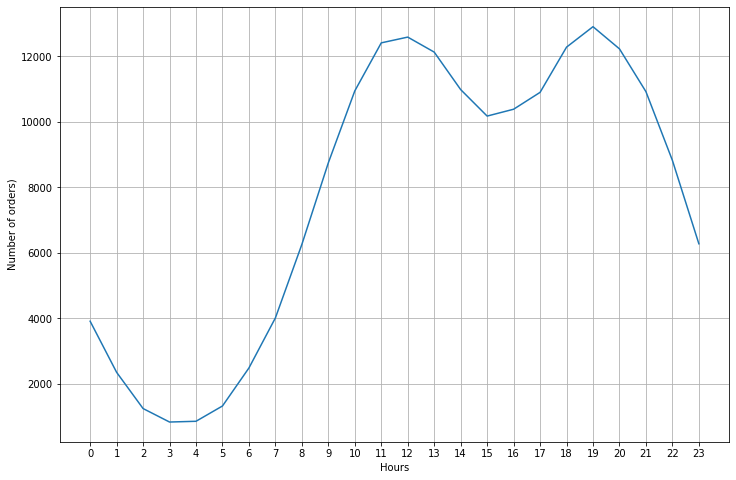

In [65]:
plt.figure(figsize=(12,8))
x = all_data.groupby('hour')['count'].count().index
y = all_data.groupby('hour')['count'].count()
plt.ticklabel_format(style='plain')
plt.xlabel('Hours')
plt.ylabel('Number of orders)')
plt.xticks(x)
plt.plot(x, y)
plt.grid()

---
# Question 4: What products is likely to be sold together?
---

In [70]:
duplicated_data = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicated_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sum,month,city,hour,count
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,1
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19,1
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19,1
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11,1
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,4,San Francisco,17,1
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,4,San Francisco,17,1
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,4,New York City,11,1
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,4,New York City,11,1


In [73]:
duplicated_data['grouped_products'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
duplicated_data.head()

duplicated_data_subset = duplicated_data[['Order ID', 'grouped_products']].drop_duplicates()

duplicated_data_subset.head()

<ipython-input-73-ca0831710684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_data['grouped_products'] = duplicated_data.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,grouped_products
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [76]:
from itertools import combinations
from collections import Counter

In [105]:
count = Counter()
for row in duplicated_data_subset['grouped_products']:
    row_list = sorted(row.split(','))
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)
count.clear()

('Lightning Charging Cable', 'iPhone') 1015
('Google Phone', 'USB-C Charging Cable') 999
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 423
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 205
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


---
# Question 5: What products sold the most? Why do you think it sold the most?
---

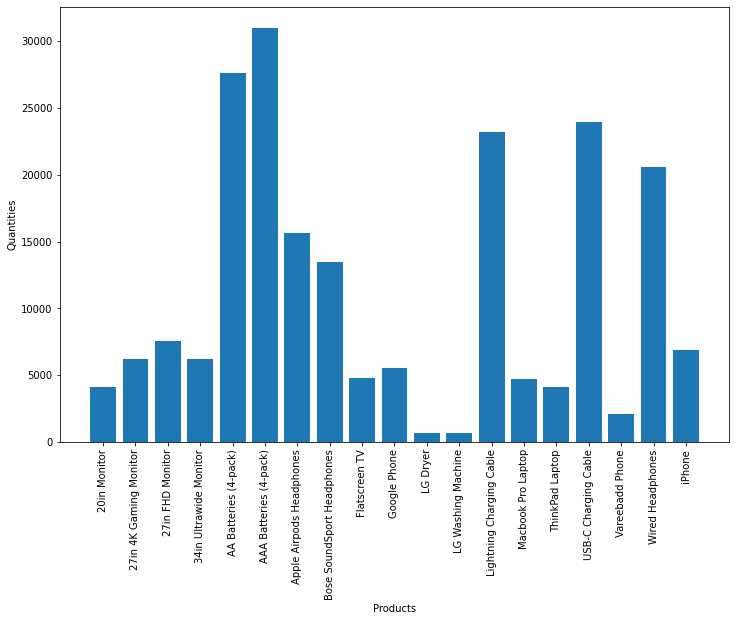

In [125]:
all_data.groupby('Product')['Quantity Ordered'].sum().index

x = all_data.groupby('Product')['Quantity Ordered'].sum().index
y = all_data.groupby('Product')['Quantity Ordered'].sum()

plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
plt.bar(x, y)
plt.xlabel('Products')
plt.ylabel('Quantities')
plt.xticks(x, rotation='vertical')
plt.show()

In [126]:
prices = all_data.groupby('Product').mean()['Price Each']

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-171-56671e99f3c6>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation='vertical', size=8)


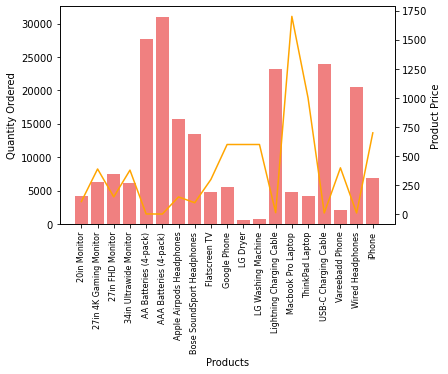

In [171]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = all_data.groupby('Product')['Price Each'].sum().index
y1 = all_data.groupby('Product')['Quantity Ordered'].sum()
y2 = all_data.groupby('Product')['Price Each'].mean()

# plt.ticklabel_format(style='plain')
ax1.bar(x, y1, color='LIGHTCORAL')
ax2.plot(x, y2, color='orange')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Product Price')
label_format = '{:,.0f}'
ax1.set_xticklabels(x,rotation='vertical', size=8)
plt.show()